**Домашнее задание к занятию «Поиск выбросов и генерация новых признаков»**

**Цель:** Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.\
**Описание задания:**\
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**1.Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).\
2.Проведите первичный анализ.\
а) Проверьте количество записей для каждого класса. Сделайте вывод.\
3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.\
4.Обучите модель дерева решений RandomForestClassifier на обучающем множестве.\
5.Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).**

In [161]:
import pandas as pd
import numpy as np
import math

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [162]:
glass_df = pd.read_csv('glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [163]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [164]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [165]:
glass_df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Классы представлены неравномерно.

In [166]:
from sklearn.ensemble import RandomForestClassifier

Напишем функцию для построения модели

In [167]:
def RF_classifier_score(data):
    '''Функция обучает модель RandomForestClassifier и подсчитывает accuracy'''
    
    # определяем признаки и целевую переменную
    X = data.drop(columns = 'Type')
    y = data['Type']

    # делим выборку на тренировочную и тестовую
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify = y, random_state = 42)
    
    # обучаем модель
    RF_model = RandomForestClassifier(random_state = 42)
    RF_model.fit(X_train, y_train)

    # делаем предсказание
    y_pred = RF_model.predict(X_test)

    # возвращаем метрику
    return RF_model.score(X_test, y_test)

In [168]:
score = round(RF_classifier_score(glass_df), 3)
score

0.837

**6.Обработайте выбросы в данных.\
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?\
b) Исследуйте признаки на выбросы несколькими способами.\
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.\
7.Повторите п. 4, п. 5.**

In [169]:
def boxplot(data, columns = []):
    '''Функция строит boxplot'''
    
    for col in columns:
        plt.figure(figsize = (15,5))
        sns.boxplot(x = data[col])
        plt.show()

In [170]:
def displot(data, columns = []):
    '''Функция строит displot'''
    
    for col in columns:
        plt.figure(figsize = (15,5))
        sns.displot(x = data[col])
        plt.show()

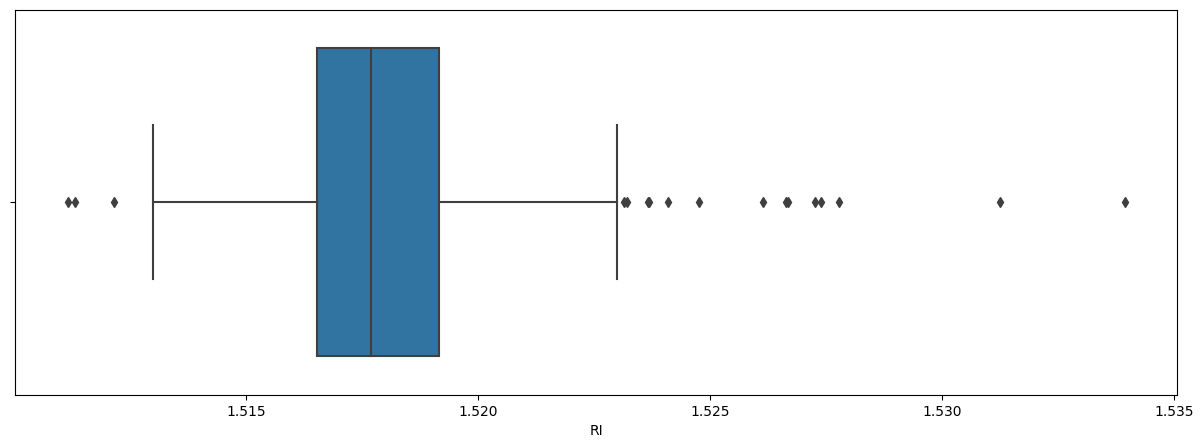

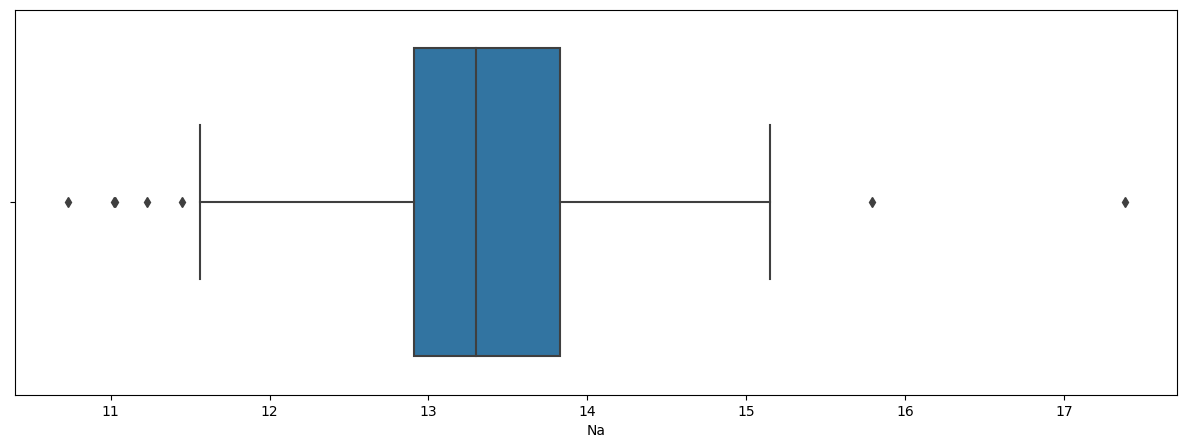

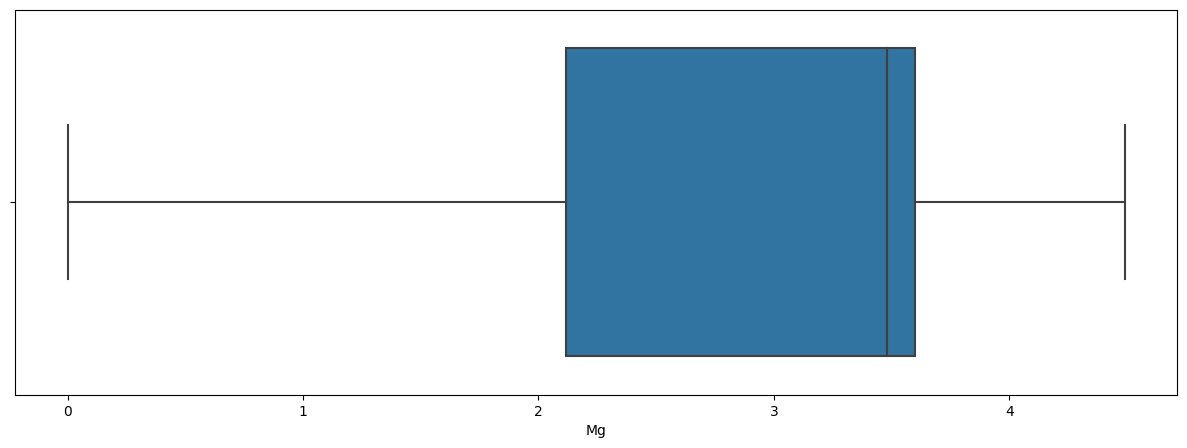

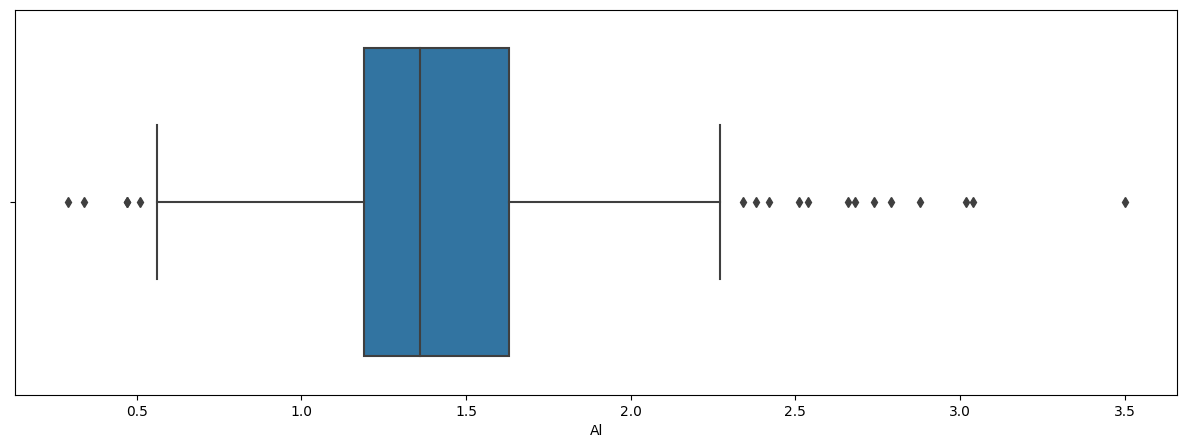

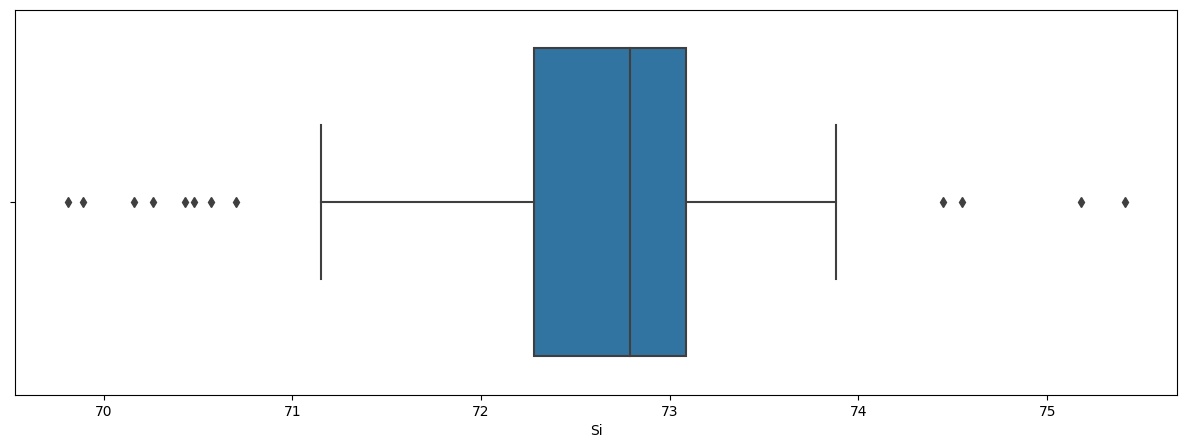

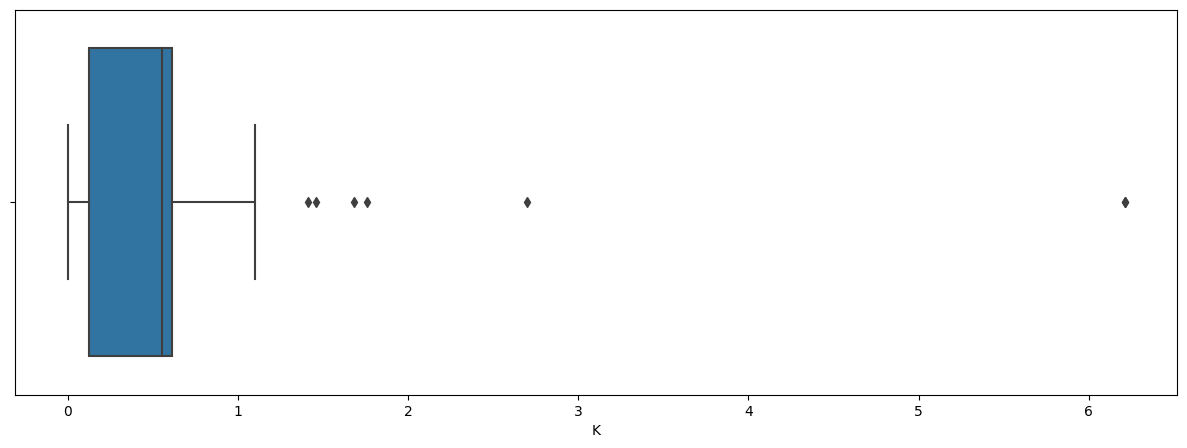

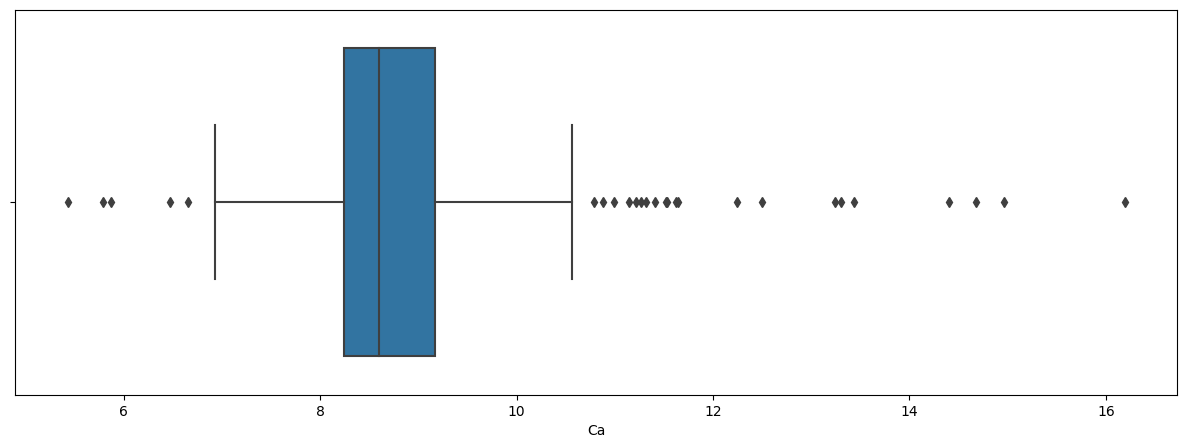

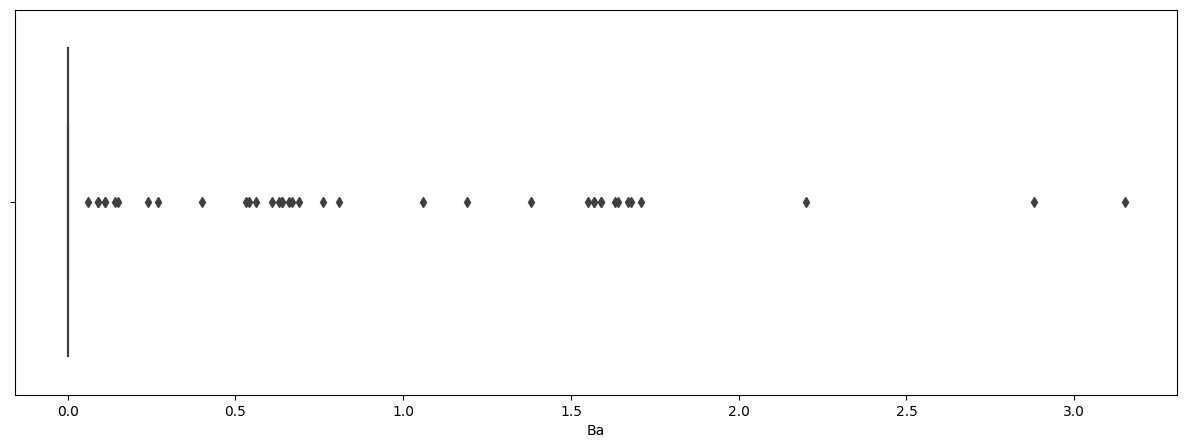

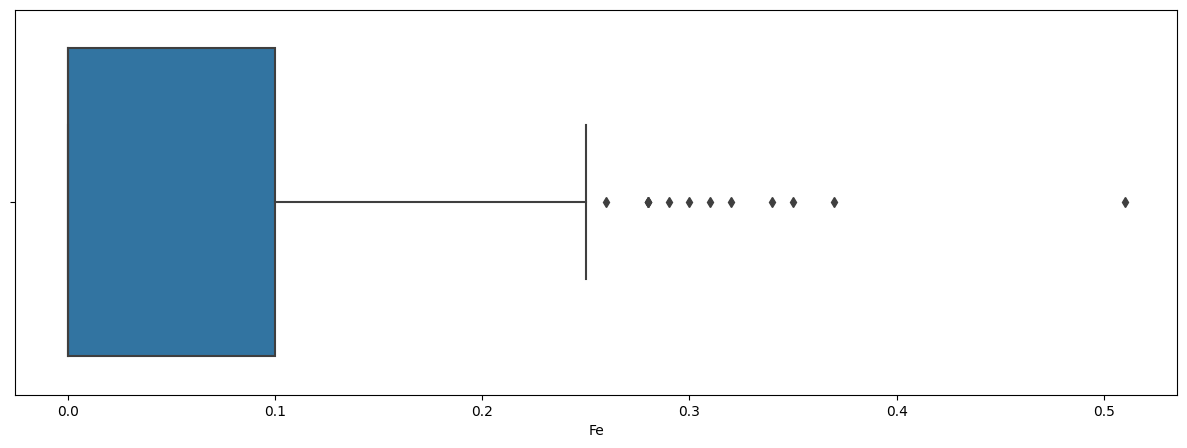

In [171]:
boxplot(glass_df, np.array(glass_df.drop(columns = 'Type').columns))

<Figure size 1500x500 with 0 Axes>

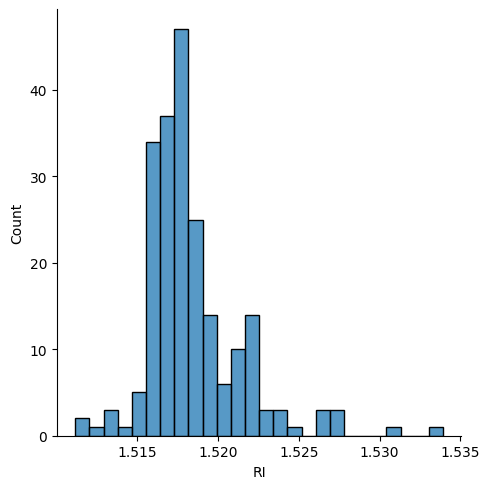

<Figure size 1500x500 with 0 Axes>

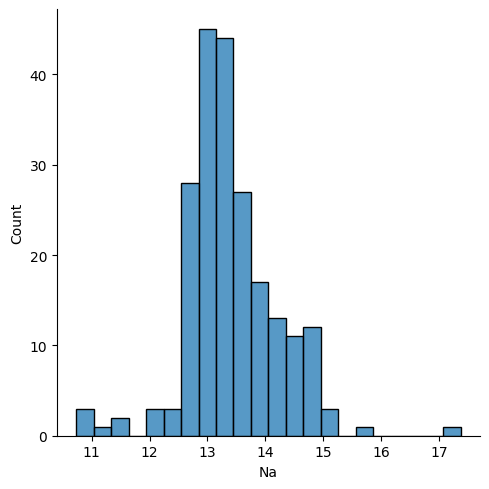

<Figure size 1500x500 with 0 Axes>

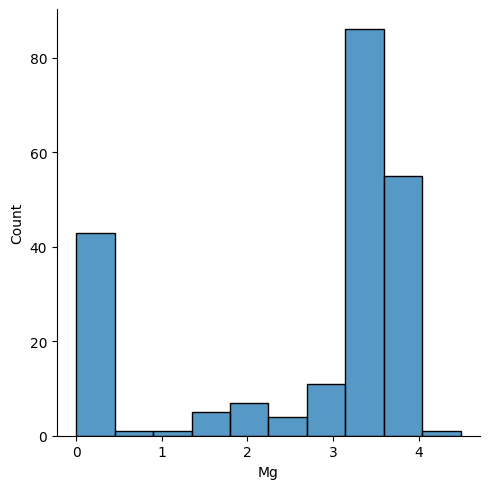

<Figure size 1500x500 with 0 Axes>

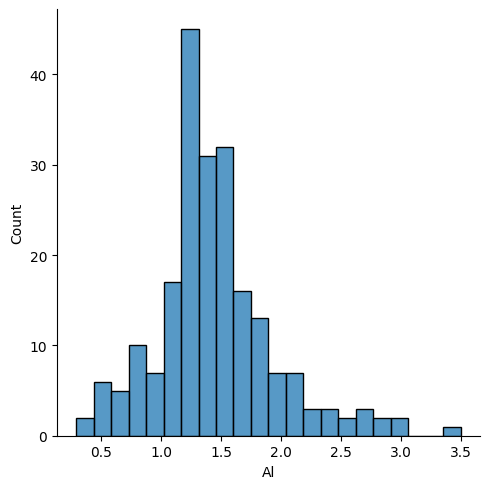

<Figure size 1500x500 with 0 Axes>

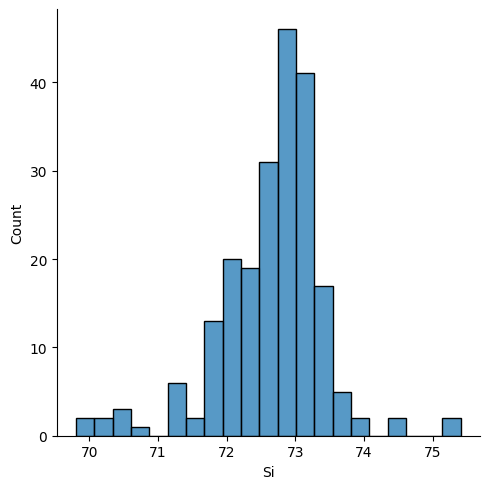

<Figure size 1500x500 with 0 Axes>

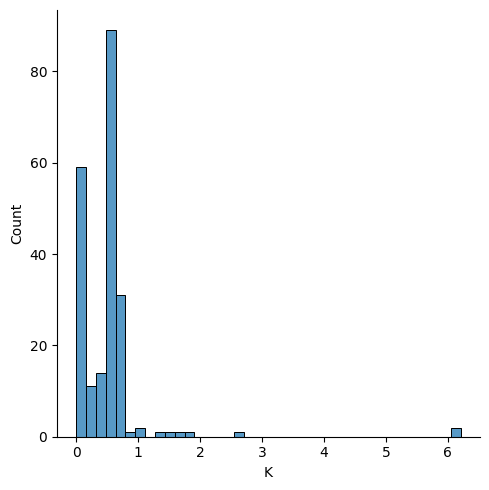

<Figure size 1500x500 with 0 Axes>

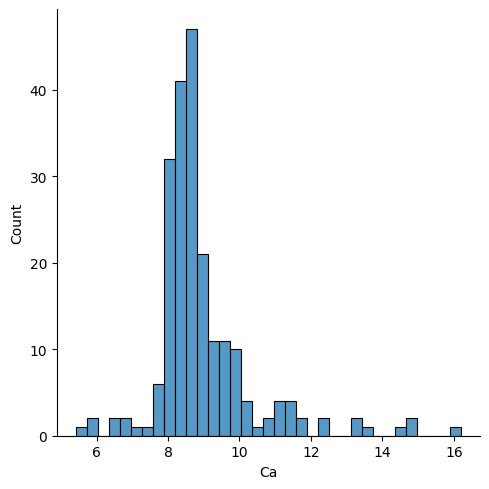

<Figure size 1500x500 with 0 Axes>

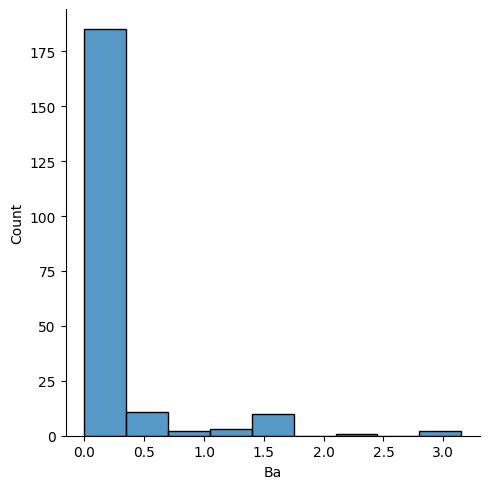

<Figure size 1500x500 with 0 Axes>

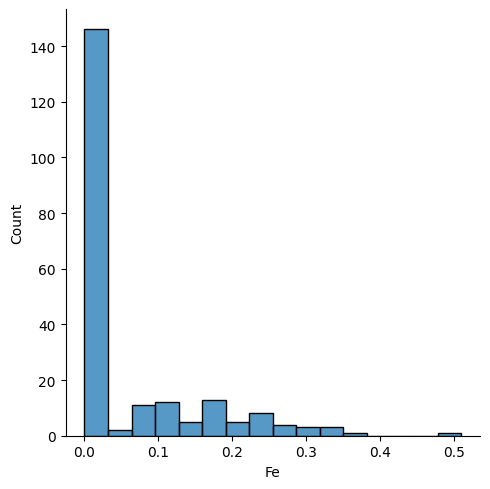

In [172]:
displot(glass_df, np.array(glass_df.drop(columns = 'Type').columns))

Удалим выбросы по результатам визуального анализа.

In [173]:
glass_df_VA = glass_df[
    (glass_df['RI'] < 1.530) &
    (glass_df['Na'] < 15.2) &
    (glass_df['Na'] > 11.6) &
    (glass_df['Al'] < 3.2) &
    (glass_df['Si'] < 74.2) &
    (glass_df['Si'] > 71) &
    (glass_df['K'] < 1.2) &
    (glass_df['Ca'] < 12) &
    (glass_df['Ca'] > 6) &
    (glass_df['Fe'] < 0.4)]

Посомтрим, как сработает модель

In [174]:
score_VA = round(RF_classifier_score(glass_df_VA), 3)
score_VA

0.842

Результат стал чуть лучше.

Посчитаем процент удалённых записей для каждого класса

In [175]:
def deleted_percent_for_class(data1, data2, col):
    '''Функция подсчитывает процент удалённых записей по каждому классу '''
    
    percent_dict = {}

    for cl in data1['Type'].unique():
        del_percent = 100 * (len(data1[data1[col] == cl]) - 
                            len(data2[data2[col] == cl])) / \
                            len(data1[data1[col] == cl])

        percent_dict[cl] = round(del_percent, 2)

    print(f'Процент удалённых записей для каждого класса: {percent_dict}')

In [176]:
deleted_percent_for_class(glass_df, glass_df_VA, 'Type')

Процент удалённых записей для каждого класса: {1: 0.0, 2: 11.84, 3: 0.0, 5: 61.54, 6: 22.22, 7: 20.69}


Проверим признаки на нормальность распределения.

In [177]:
from scipy import stats

In [178]:
def normal_dist(list_data):
    """ Функция проверяет распредление данных на нормальность
    с помощью теста Шапиро-Уилка"""
    
    result = []
    for data in list_data:       
        stat, p = stats.shapiro(data)

        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            result.append('Нормальное')
        else:
            result.append('Ненормальное')
    
    return result

In [179]:
normal_dist([glass_df['Al'], glass_df['Ba'], glass_df['Ca'], glass_df['Fe'], 
             glass_df['K'], glass_df['Mg'], glass_df['Na'], glass_df['RI'], glass_df['Si']])

stat=0.943, p=0.000
stat=0.409, p=0.000
stat=0.794, p=0.000
stat=0.653, p=0.000
stat=0.442, p=0.000
stat=0.699, p=0.000
stat=0.946, p=0.000
stat=0.868, p=0.000
stat=0.920, p=0.000


['Ненормальное',
 'Ненормальное',
 'Ненормальное',
 'Ненормальное',
 'Ненормальное',
 'Ненормальное',
 'Ненормальное',
 'Ненормальное',
 'Ненормальное']

У всех признаков распределение ненормальное. Поэтому по гистограмме трудно судить о выбросах.

Посмотрим на выбросы с помощью кластеризации **kmeans**

In [180]:
from scipy import cluster
from scipy.cluster.vq import kmeans

In [181]:
def kmeans_anomalies(data, columns = []):
    '''Функция определяет кластеры  с помощью kmeans 
    по каждому признаку и строит графики'''
    
    for col in columns:
        col_raw = data[col].values 
        
        # Для совместимости со SciPy 
        col_raw = col_raw.reshape(-1, 1)
        col_raw = col_raw.astype('float64')
        centroids, avg_distance = kmeans(col_raw, 6)
        
        # Получаем кластеры и расстояния
        groups, cdist = cluster.vq.vq(col_raw, centroids)    
        
        # Рисуем график
        plt.scatter(col_raw, np.arange(0, data[col].shape[0]), c = groups)
        plt.xlabel(col)
        plt.ylabel('Indices')
        plt.show()

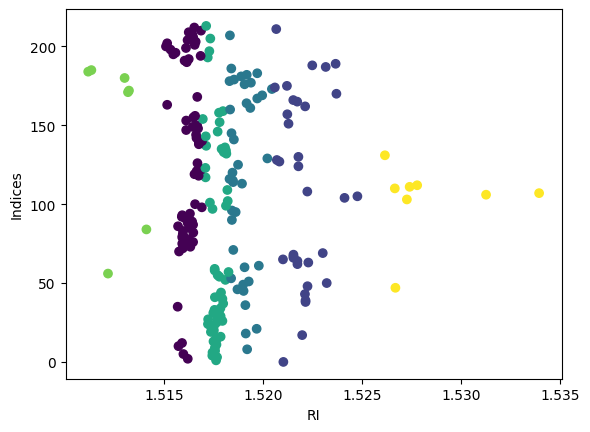

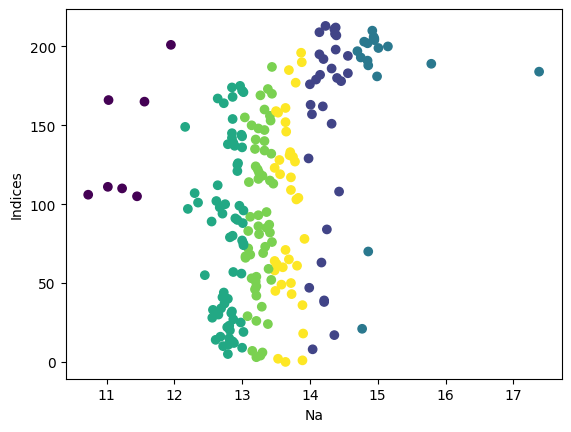

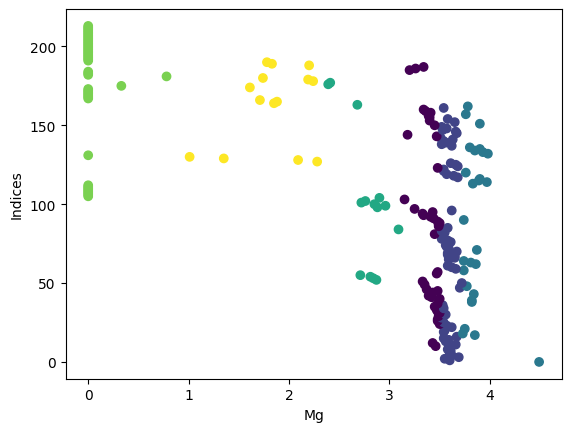

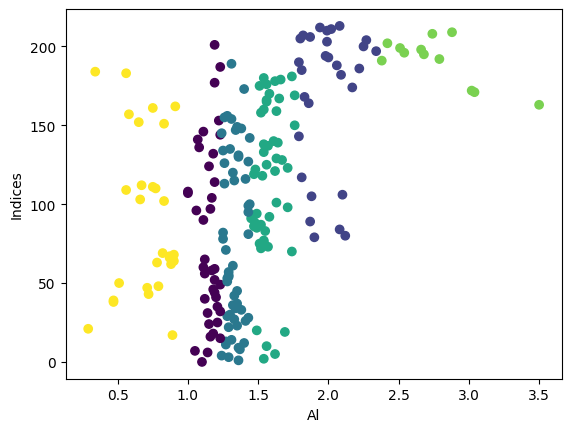

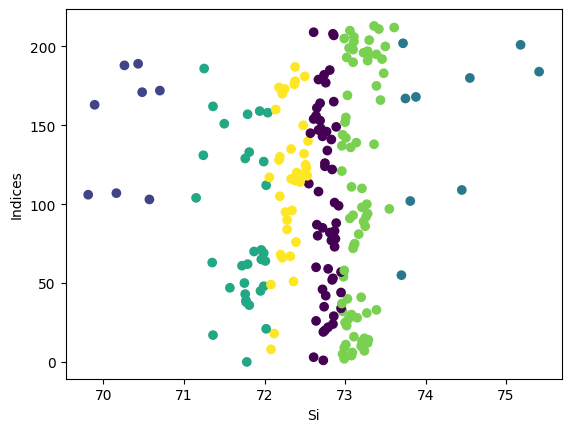

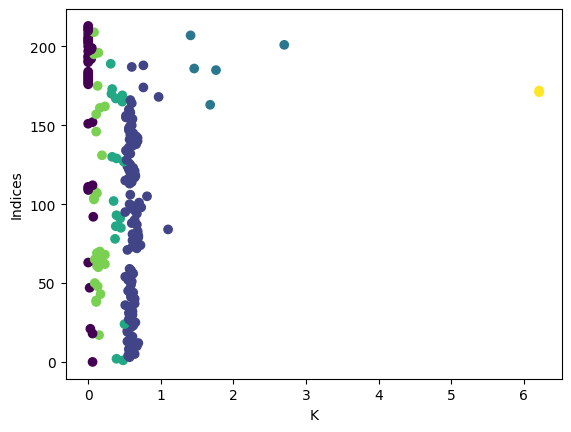

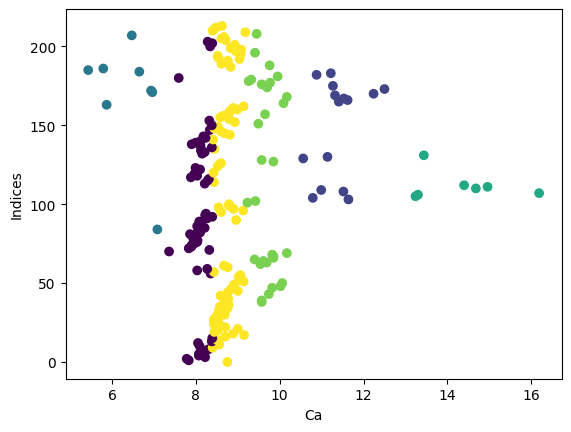

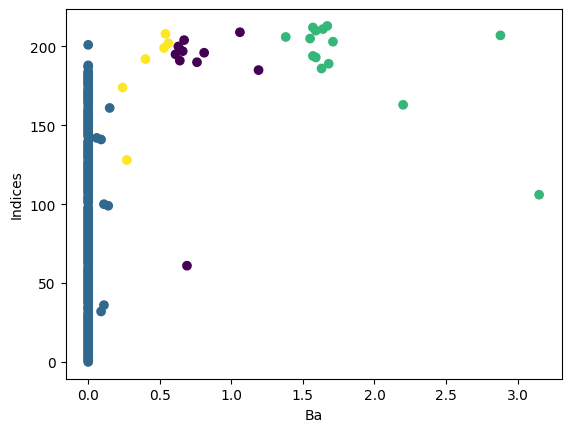

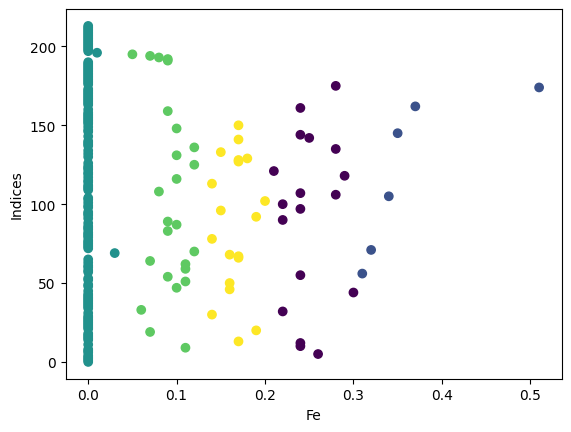

In [182]:
kmeans_anomalies(glass_df, np.array(glass_df.drop(columns = 'Type').columns))

По графикам хорошо заметны выбросы.

Проверим данные на выбросы с помощью моделей DBSCAN и Isolation Forest


In [183]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [184]:
glass_df.shape

(214, 10)

Сначала попробуем **DBSCAN**

In [185]:
outlier_detection = make_pipeline(StandardScaler(), DBSCAN(min_samples = 2, eps = 1))
clusters = outlier_detection.fit_predict(glass_df.drop(columns = 'Type'))
list(clusters).count(-1)

49

Удалим найденные выбросы

In [186]:
glass_df_drop_anomalies = glass_df.drop(glass_df[clusters == -1].index)
glass_df_drop_anomalies.reset_index(drop = True, inplace = True)

In [187]:
glass_df_drop_anomalies.shape

(165, 10)

Посмотрим, как сработает модель

In [188]:
score_DBSCAN = round(RF_classifier_score(glass_df_drop_anomalies), 3)
score_DBSCAN

0.879

После удаления выбросов с помощью модели DBSCAN, модель Random Forest сработала лучше.

Посчитаем процент удалённых записей для каждого класса

In [189]:
deleted_percent_for_class (glass_df, glass_df_drop_anomalies, 'Type')

Процент удалённых записей для каждого класса: {1: 7.14, 2: 21.05, 3: 17.65, 5: 84.62, 6: 55.56, 7: 31.03}


Данных в 5 классе осталось совсем мало, учитывая, что изначально их было всего 13, удаление почти 85% - это очень много. в 6 классе тоже много удалено. НО метрика показала более лучший результат.

Попробуем **IsolationForest**

In [190]:
clf = IsolationForest(max_samples = 100, random_state = 42, contamination = 'auto')
preds = clf.fit_predict(glass_df.drop(columns = 'Type'))
list(preds).count(-1)

37

Удалим выбросы

In [191]:
glass_df_drop_anomalies_IF = glass_df.drop(glass_df[preds == -1].index)
glass_df_drop_anomalies_IF.reset_index(drop = True, inplace = True)

In [192]:
glass_df_drop_anomalies_IF.shape

(177, 10)

Посмотрим, как сработает модель

In [193]:
score_IF = round(RF_classifier_score(glass_df_drop_anomalies_IF), 3)
score_IF

0.861

Результат чуть лучше, чем после удаления выбросов, найденных с помощью визуального анализа, и хуже, чем после удаления выбросов, найденных с помощью DBSCAN

Посчитаем процент удалённых данных для каждого класса

In [194]:
deleted_percent_for_class (glass_df, glass_df_drop_anomalies_IF, 'Type')

Процент удалённых записей для каждого класса: {1: 1.43, 2: 11.84, 3: 5.88, 5: 38.46, 6: 33.33, 7: 62.07}


Довольно много данных удалено в 7 классе.

**8.Сформулируйте выводы по проделанной работе.\
а) Кратко опишите, какие преобразования были сделаны с данными.\
b) Сравните точность двух моделей.\
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.**

а) Данные были очищены от выбросов несколькими разными способами:
- на основе визуального анализа
- с помощью модели DBSCAN
- c помощью модели Isolation Forest


In [195]:
data = {'data': ['Без удаления выбросов', 'Удаление выбросов на основе визуального анализа', 
                  'Удаление выбросов на основе модели DBSCAN', 
                 'Удаление выбросов на основе модели Isolation Forest'],
        'score': [score, score_VA, score_DBSCAN, score_IF],
        'remaining data': [glass_df.shape[0], glass_df_VA.shape[0], 
                           glass_df_drop_anomalies.shape[0], 
                           glass_df_drop_anomalies_IF.shape[0]]} 
 
df_compare_results = pd.DataFrame(data)

df_compare_results

,data,score,remaining data
0,Без удаления выбросов,0.837,214
1,Удаление выбросов на основе визуального анализа,0.842,189
2,Удаление выбросов на основе модели DBSCAN,0.879,165
3,Удаление выбросов на основе модели Isolation F...,0.861,177


В нашем датасете изначально было очень мало данных. При удалении большого количества выбросов, модель могла начать работать хуже. Но в нашем случае, лучше всего она сработала, когда мы удалили выбросы на основе модели DBSCAN, и было удалено самое большое количество данных. При работе с моделью Random Forest стало понятно, что удаление выбросов идёт на пользу.